In [3]:
import pyvsc
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Parameter obtention from manufacturer data

In [11]:
k2deg = 273.15

man_electric = {
        'i_1':1400 ,'m_1':0.8 , 'cosphi_1':0.8,'p_igbt_1':3570 ,'p_diode_1':1046 ,
        'i_2':1000 ,'m_2':0.8 , 'cosphi_2':0.2,'p_igbt_2':1952 ,'p_diode_2': 931 ,
        'i_3':1300 ,'m_3':0.8 , 'cosphi_3':0.2,'p_igbt_3':2772 ,'p_diode_3':1252 ,
        'i_4':1000 ,'m_4':0.1 , 'cosphi_4':0.2,'p_igbt_4':1882 ,'p_diode_4': 987 ,
        'i_5':1500 ,'m_5':0.85, 'cosphi_5':0.5,'p_igbt_5':3749 ,'p_diode_5':1293 ,
        }    

man_thermal = {
        'p_igbt':3570 ,'p_diode':1046 , 'T_igbt':125+k2deg , 'T_diode':97+k2deg , 'T_sink':57.3+k2deg, 'T_a':40.0+k2deg}


params = pyvsc.man2param(man_electric,man_thermal)
print(params)

{'a_i': array([918.49392499]), 'b_i': array([-0.27288413]), 'c_i': array([0.00730762]), 'd_i': array([0.00122639]), 'e_i': array([-0.00050731]), 'a_d': array([205.85023772]), 'b_d': array([0.49125489]), 'c_d': array([0.19609086]), 'd_d': array([0.00029789]), 'e_d': array([0.00020391]), 'R_th_igbt_sink': 0.018963585434173667, 'R_th_diode_sink': 0.037954110898661554, 'R_th_sink_a': 0.003747833622183711}


### Model results

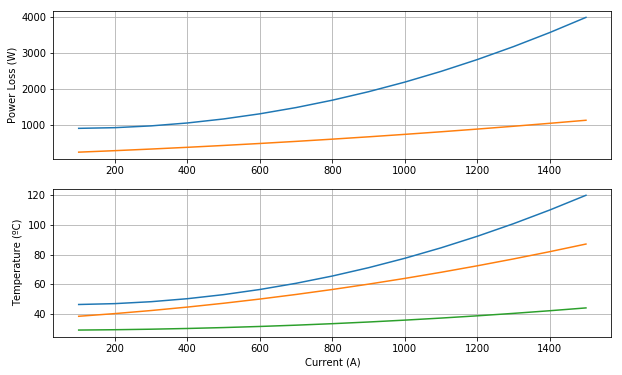

In [9]:
I_min, I_max, I_step = 100,1600,100
cos_phi, modulation = 0.8, 0.8
T_ambient_deg = 25.0
k2deg = 273.15

I = np.arange(I_min, I_max, I_step)
sim_e,sim_th = pyvsc.vscthmodel(I, cos_phi, modulation, T_ambient_deg+273.15, params)


fig, (ax0,ax1) = plt.subplots(nrows=2)   # creates a figure with one axe
fig.set_size_inches(10,6)
ax0.plot(I, sim_e['p_igbt']) 
ax0.plot(I, sim_e['p_diode']) 

ax1.plot(I, sim_th['T_igbt_deg']) 
ax1.plot(I, sim_th['T_diode_deg'])
ax1.plot(I, sim_th['T_sink_deg'])

ax0.set_ylabel('Power Loss (W)')
ax1.set_ylabel('Temperature (ºC)')

ax1.set_xlabel('Current (A)')
ax0.grid(True)
ax1.grid(True)